# Músculo de  la mano abductor corto del pulgar izquierdo con ejercicios de precisión

In [1]:
import math            #Permite usar funciones matemáticas definidas en el estándar de C.
import numpy as np     #Creación de vectores y matrices multidimensionales,permite usar otras funciones matemáticas.
import scipy as sc     #Módulos para álgebra lineal, integración, interpolación, FFT, procesamiento de señales y de imagen, etc.
from scipy import signal 
from scipy.signal import butter, lfilter, filtfilt #Herramientas de procesamiento de señales, funciones de filtrado, algoritmos de interpolación.
import wave            #El módulo proporciona una interfaz para el formato de sonido WAV.
import matplotlib.pyplot as plt

#### Comandos para configuración de las imágenes/gráficos 

Configuramos para ver las figuras en notebook, creación de etiquetas, módulos para la creación de trazos.

In [2]:
#Comando para ver figuras en el cuaderno Jupyter
%matplotlib inline 

#Módulo de trazado de importación
import matplotlib.pyplot as plt 

#Comandos para crear figuras de alta resolución con etiquetas grandes
%config InlineBackend.figure_formats = {'png', 'retina'} 
plt.rcParams['axes.labelsize'] = 18                              #Tamaño de fuente para etiquetas de figuras
plt.rcParams['axes.titlesize'] = 20                              #Tamaño de fuente para títulos de figuras
plt.rcParams['font.size'] = 16                                   #Tamaño de fuente para números de figura
plt.rcParams['lines.linewidth'] = 1.6                            #Ancho de línea para trazar

## Extraer y graficar los datos

Las grabaciones de EMG se obtuvieron utilizando Backyard Brains EMG Spiker Box y se guardan como archivos de audio en formato .wav. Utilizando las librerías para visualizar nuestros datos, posteriormente con el uso de otros comandos almacenaremos los resultados relevantes para los cálculos/ análisis posteriores.

#### Músculo de  la mano abductor corto del pulgar izquierdo con ejercicios de precisión

In [3]:
def EMG(archivo):
    
    # Visualización del archivo .wav, es necesario saber la ubicación del archivo y su nombre.
    #Los archivos WAV contienen una secuencia de bits que representan los datos de audio sin procesar.
    record = wave.open(archivo)
    
    #Obtención del número de canales, frecuencia de muestreo, número de fotogramas. 
    NumCanales = record.getnchannels()      #Número de canales y retorna el número de canales de audio. 
    N= record.getnframes()                  #Número de fotogramas.
    FrecMuestreo = record.getframerate()    #Retorna la frecuencia del muestreo.
    AnchoMuestra=record.getsampwidth()      #Retorna el ancho de la muestra en bytes.
    
    #Análisis de datos del archivo .wav
    dstr = record.readframes(N * NumCanales) #Lee y retorna como máximo n cuadros de audio, como un objeto bytes.
    waveData = np.frombuffer(dstr, np.int16) #np.frombuffer es una función para crear una matriz unidimensional utilizando un búfer. 
    #El módulo de ondas "wave" proporciona una interfaz conveniente para el formato de sonido WAV. 
    
    #Imprimimos el número de canales, la frecuencia de muestreo y el ancho de muestra.
    print('La grabación tiene %d canal(ó canales).' % (NumCanales))
    print('La frecuencia de muestreo de la grabación es %d Hz.' % (FrecMuestreo))
    print('La grabación tiene un ancho de muestra de %d' % (AnchoMuestra))
    
    #Calcular la ventana, se utiliza la función linspace para crear matrices con valores espaciados uniformemente, esta 
    #función utiliza una matriz con 5 valores que se encuentren entre 0 y 2.
    EMGtiempo=np.linspace(0, len(waveData)/FrecMuestreo, num=len(waveData))
    
    #Calcular la frecuencia.
    frec = 1/np.mean(np.diff(EMGtiempo))
    
    #Guardamos los datos más relevantes en una matriz.
    SeñalRelevante={'FrecMuestreo':FrecMuestreo,\
        'waveData':waveData,\
        'EMGtiempo':EMGtiempo,\
        'frec':frec}
    
    #Graficamos EMG.
    plt.figure(figsize=(18,6))                                                #Tamaño de la gráfica.
    plt.title('EMG del Músculo de  la mano abductor corto del pulgar izquierdo con ejercicios de precisión') #Título.
    plt.xlabel(r'Tiempo (s)')                                                 #Título del eje horizontal.
    plt.ylabel(r'Voltaje ($\mu$V)')                                           #Título del eje vertical.
    plt.plot(EMGtiempo,waveData, 'black')                                     #Color de la señal.
    plt.xlim(0,max(EMGtiempo));
    
    return SeñalRelevante

La grabación tiene 1 canal(ó canales).
La frecuencia de muestreo de la grabación es 44100 Hz.
La grabación tiene un ancho de muestra de 2


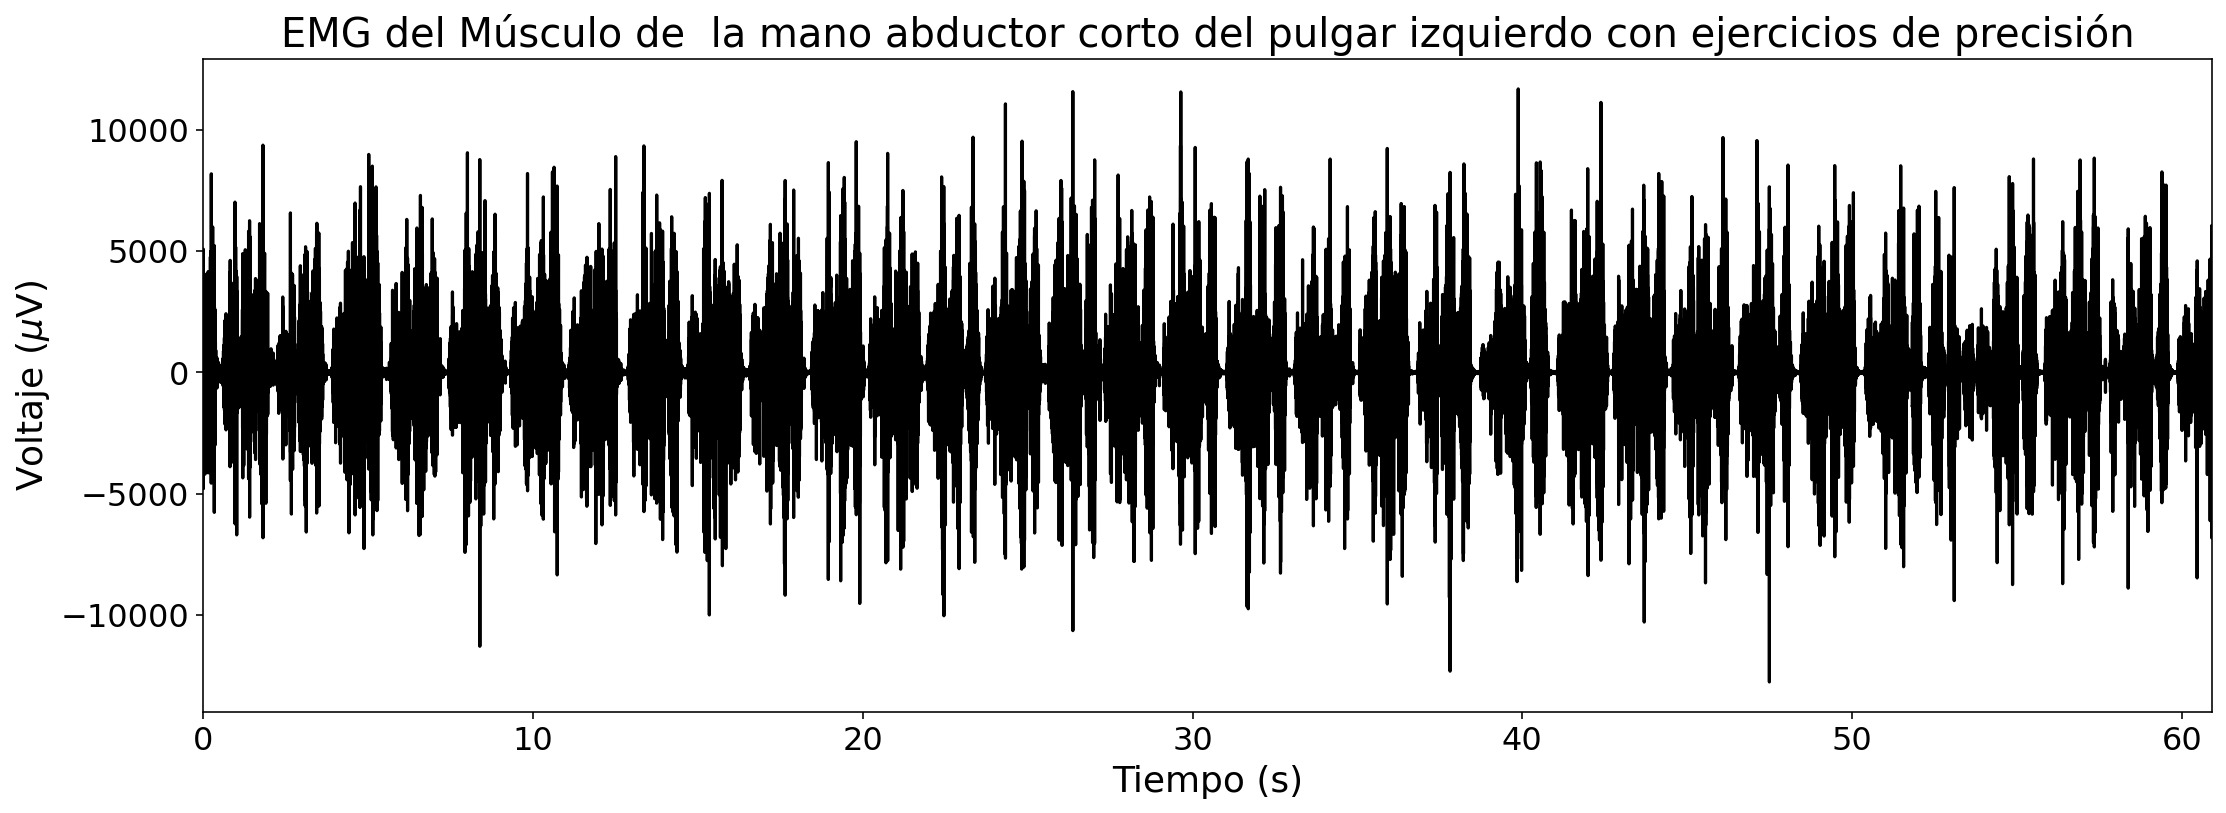

In [4]:
SeñalRelevante = EMG(archivo='../Registros/Mano_Abductor_Izquierda_Precisión.wav')

## Filtro Butterworth de paso banda

Para el procesamiento de las señales se hace uso de diversos filtros,el filtro Butterworth es un tipo de filtro de procesamiento de señal para tener una respuesta de frecuencia lo más plana posible en la banda de paso.

In [5]:
# Filtro Butterworth de paso banda a 10-400Hz.
b, a = butter(2, ([10, 400]/(SeñalRelevante['frec']/2)), btype = 'bandpass')
#[b, a] = butter (n, Wn, ftype) diseña un filtro Butterworth de paso bajo, paso alto, paso banda o supresión de banda.
#La señal depende del valor de ftype y el número de elementos de Wn.
 
dataf = filtfilt(b, a, SeñalRelevante['waveData'])
#Realiza un filtrado digital de fase cero procesando los datos de entrada “SeñalRelevante['waveData']”, tanto en la dirección directa como en la inversa.
#Después de filtrar los datos en la dirección de avance, filtfilt invierte la secuencia filtrada y la vuelve a ejecutar a través del filtro.

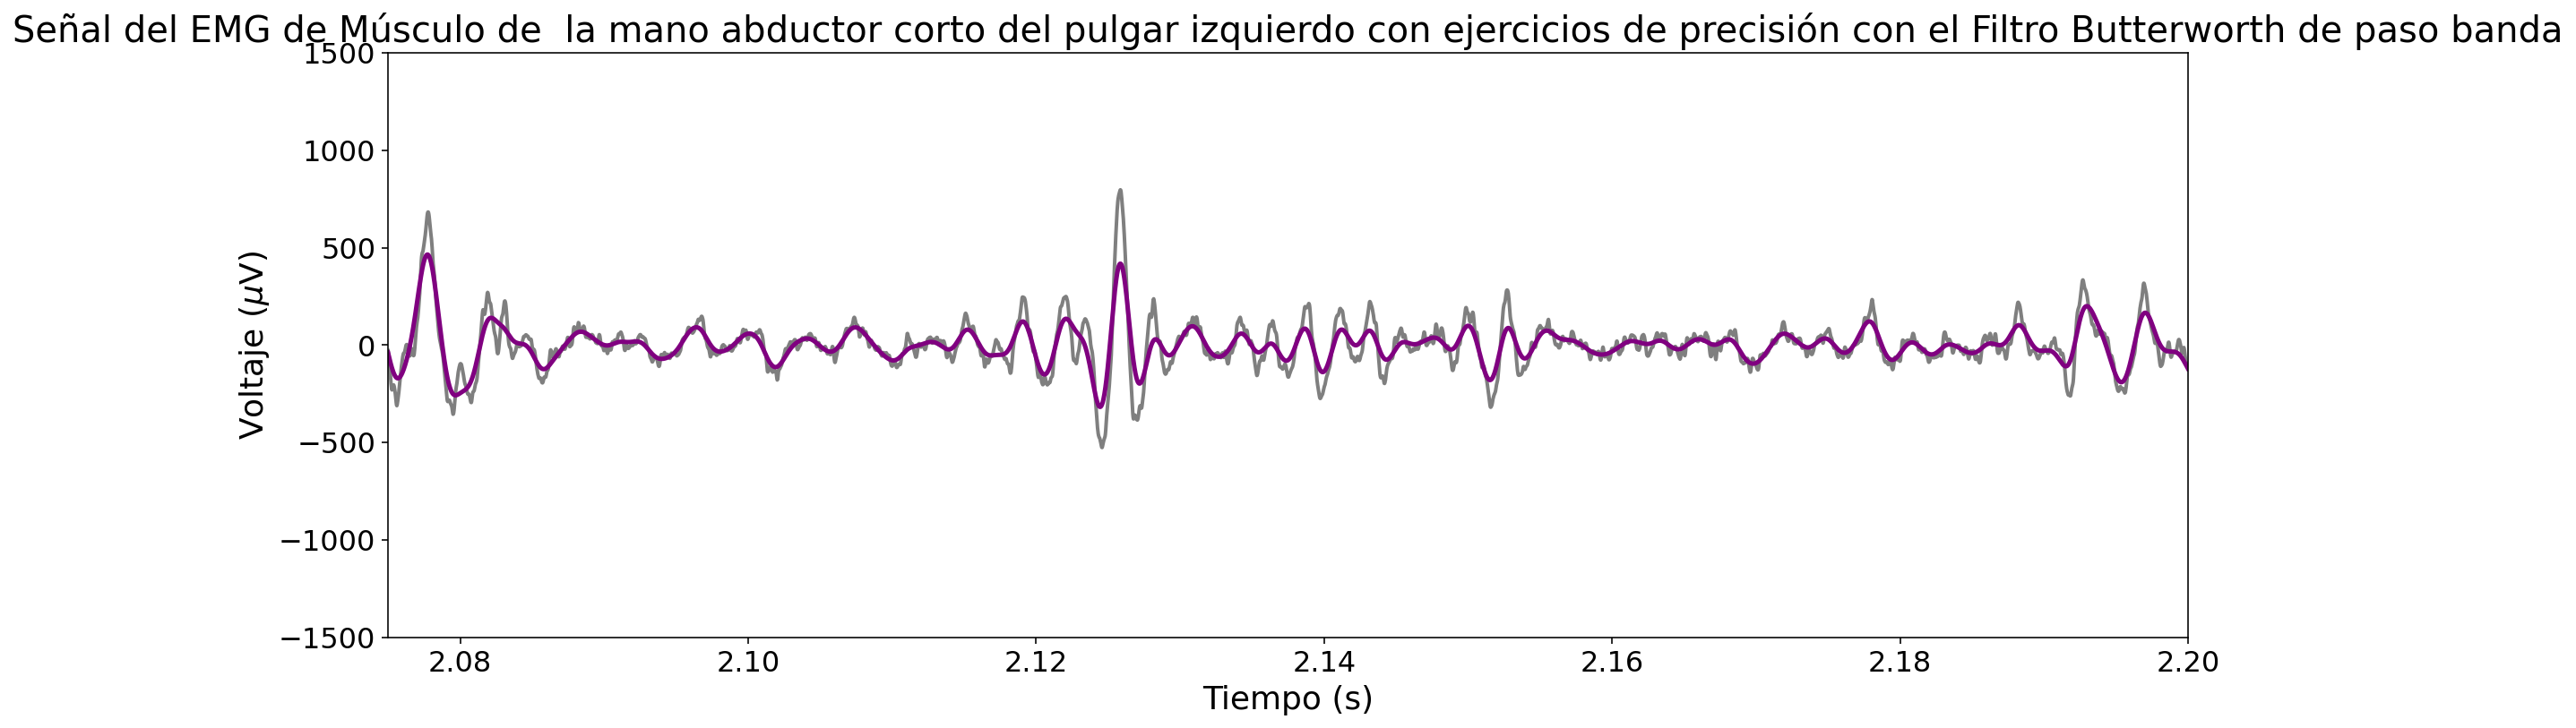

In [15]:
# Trazar la señal EMG
plt.figure(figsize=(18,6))                                               #Tamaño de la figura dibujada con Matplotlib

plt.title('Señal del EMG de Músculo de  la mano abductor corto del pulgar izquierdo con ejercicios de precisión con el Filtro Butterworth de paso banda') #Título.
plt.xlabel('Tiempo (s)')                                                 #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                           #Título del eje vertical.

plt.plot(SeñalRelevante['EMGtiempo'],SeñalRelevante['waveData'], 'black', linewidth=2.0, alpha=0.5)#Trazo de la señal con color.
plt.plot(SeñalRelevante['EMGtiempo'],dataf, 'purple', linewidth=2.5)     #Trazo de la señal con color.

#Obtiene o establece los límites x de los ejes actuales.   
plt.xlim(2.075,2.2)          #Eje x                                        
plt.ylim(-1500,1500);       #Eje y

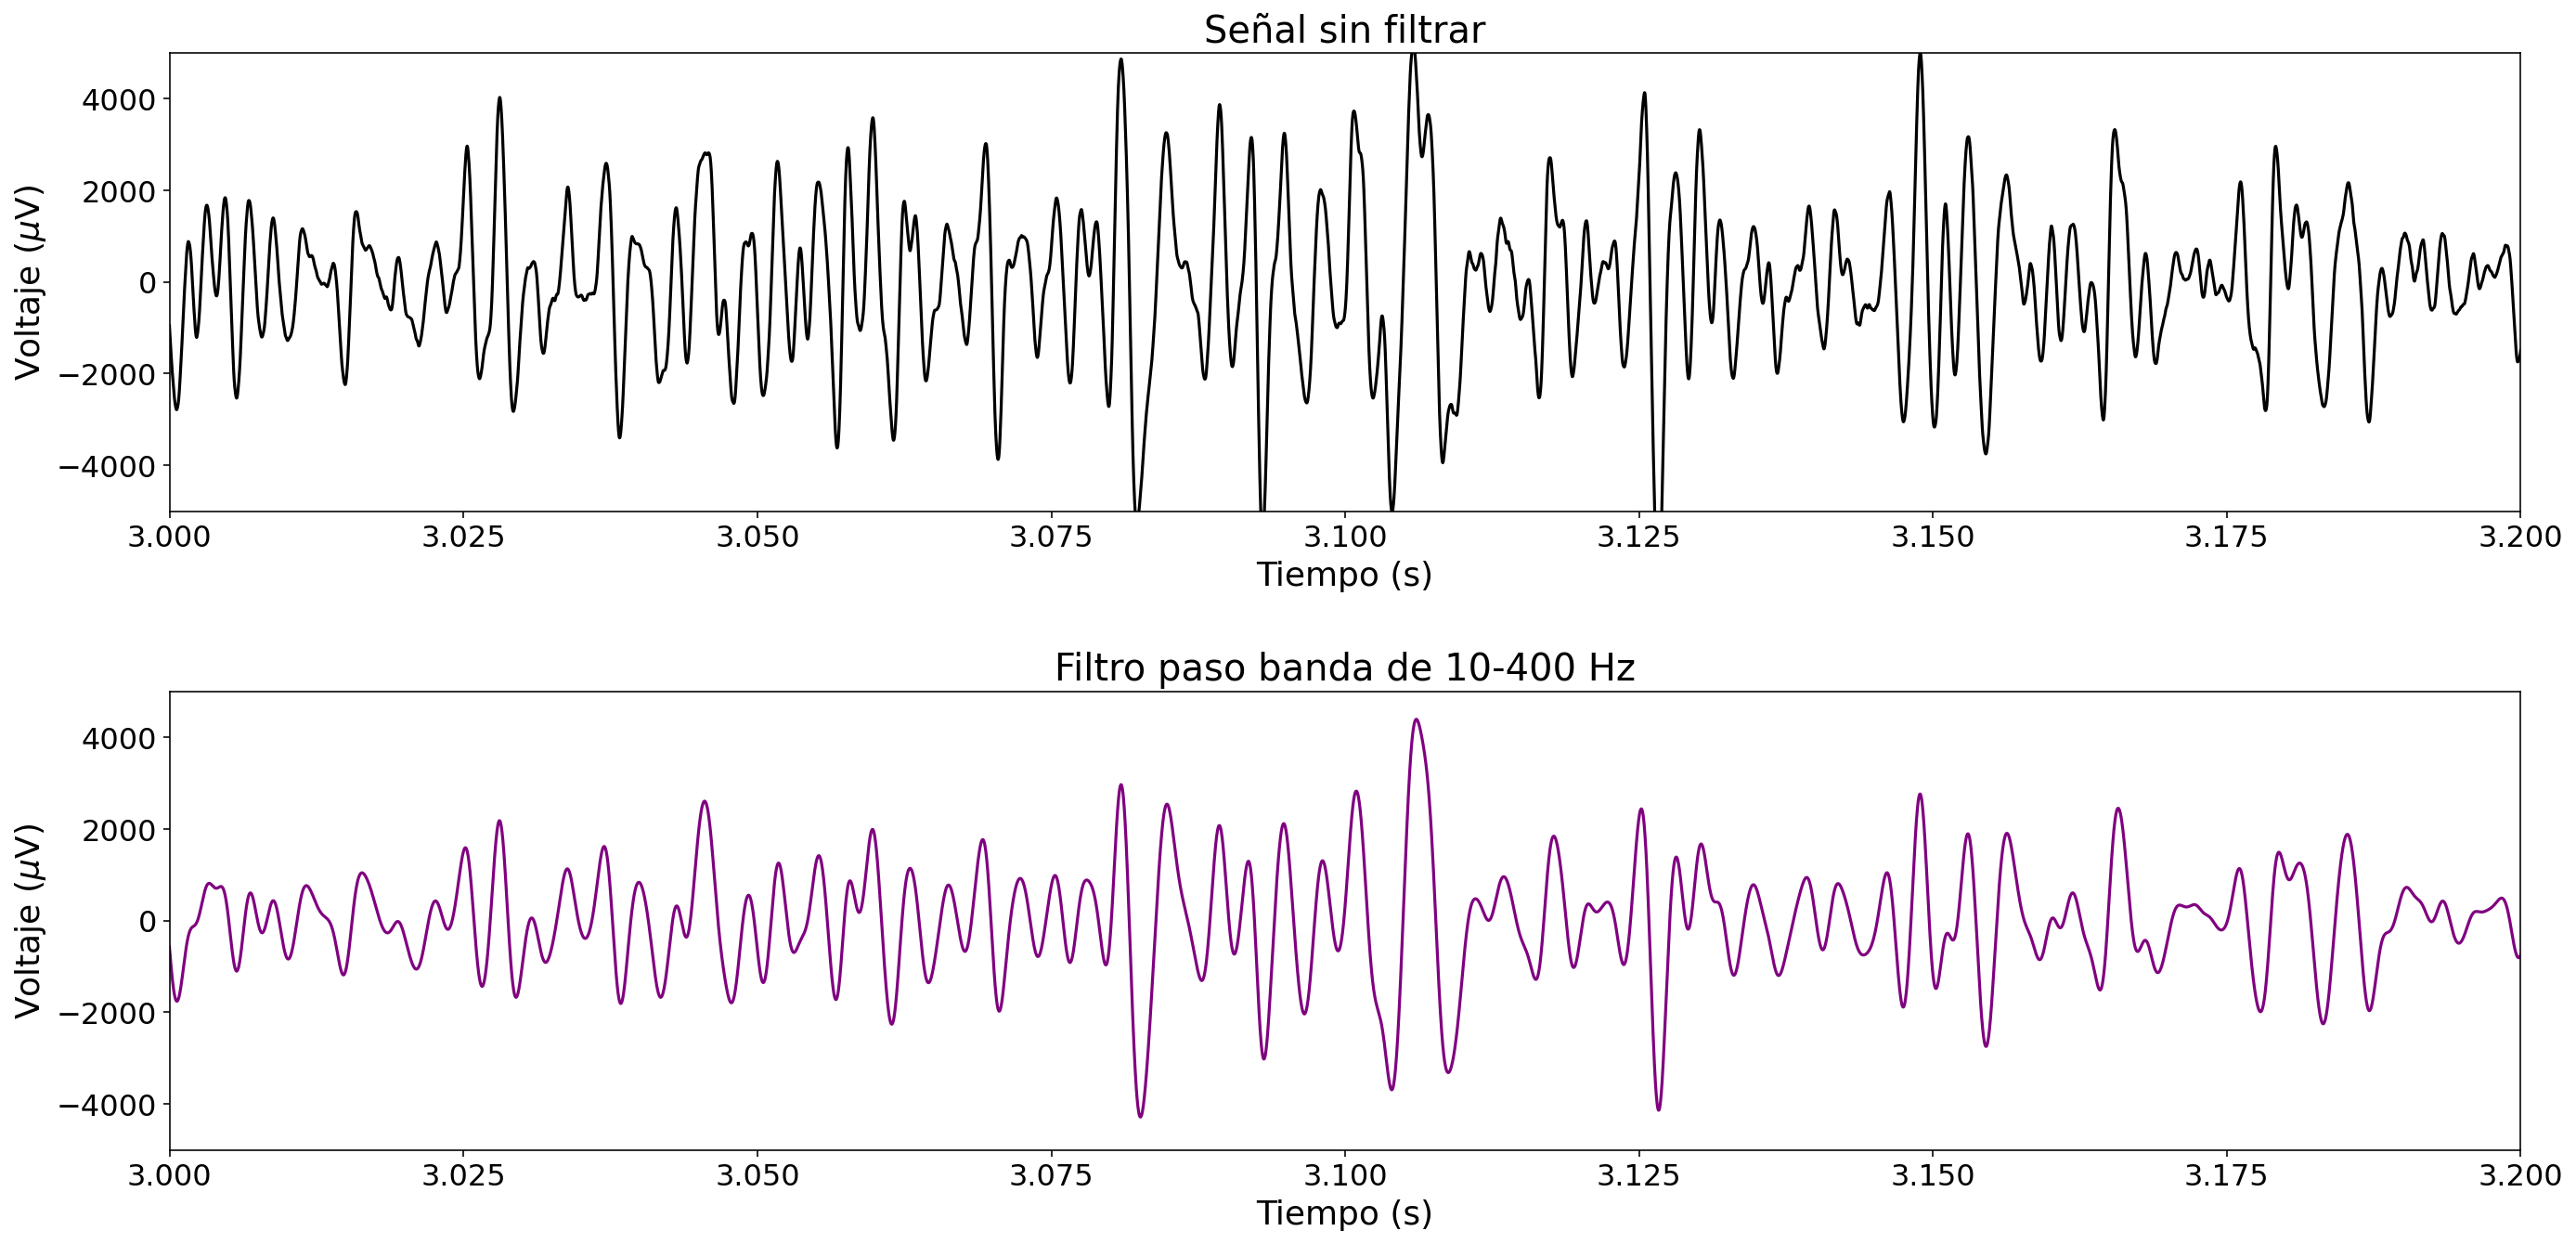

In [18]:
fig, (ax1,ax2) = plt.subplots(2, 1, sharex= False, sharey= True, figsize = (20,10))

# Trazar datos sin procesar
ax1.plot(SeñalRelevante['EMGtiempo'], SeñalRelevante['waveData'], 'black')
ax1.set_title('Señal sin filtrar', fontsize=20)
ax1.set_xlim(3.0,3.2)
ax1.set_ylim(-5000,5000)
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Voltaje ($\mu$V)')

# Trazar datos filtrados
ax2.plot(SeñalRelevante['EMGtiempo'], dataf, 'purple')
ax2.set_title('Filtro paso banda de 10-400 Hz', fontsize=20)
ax2.set_xlim(3.0,3.2)
ax2.set_ylim(-5000,5000)
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Voltaje ($\mu$V)')

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

## Valor absoluto de EMG

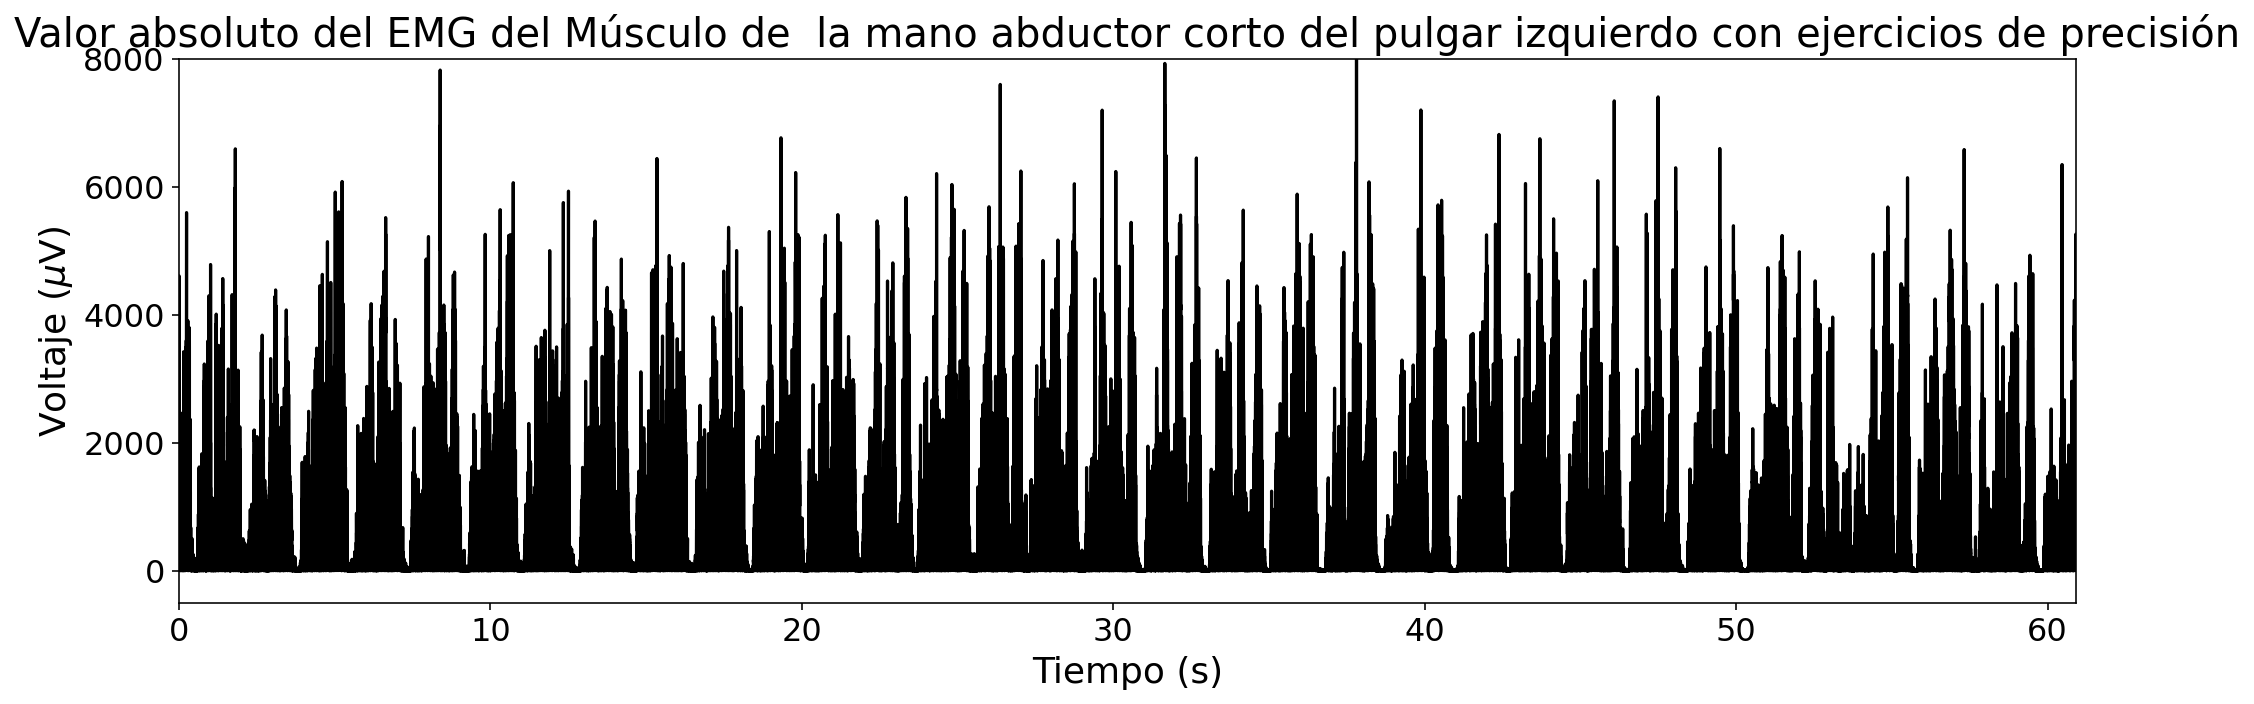

In [8]:
# Rectificar la señal EMG
AbsSeñal = np.absolute(dataf) #Calcula el valor absoluto por elementos.
Abstiempo=np.linspace(0, len(AbsSeñal)/SeñalRelevante['FrecMuestreo'], num=len(AbsSeñal))

# Trazar datos rectificados
plt.figure(figsize=(17,5))                                          #Tamaño de la gráfica.
plt.title('Valor absoluto del EMG del Músculo de  la mano abductor corto del pulgar izquierdo con ejercicios de precisión') #Título.
plt.xlabel(r'Tiempo (s)')                                           #Título del eje horizontal.
plt.ylabel(r'Voltaje ($\mu$V)')                                     #Título del eje vertical.
plt.plot(SeñalRelevante['EMGtiempo'],AbsSeñal,'black')              #Graficación y color de la señal.
plt.xlim(0,max(SeñalRelevante['EMGtiempo']))
plt.ylim(-500,8000)
plt.show()

In [9]:
# Filtro Butterworth de paso bajo para detección de envolvente
lowp = 8     
sfrec = SeñalRelevante['FrecMuestreo']
low_pass = lowp/sfrec
b, a = sc.signal.butter(4, low_pass, btype='lowpass')
datafrle = filtfilt(b, a, AbsSeñal)

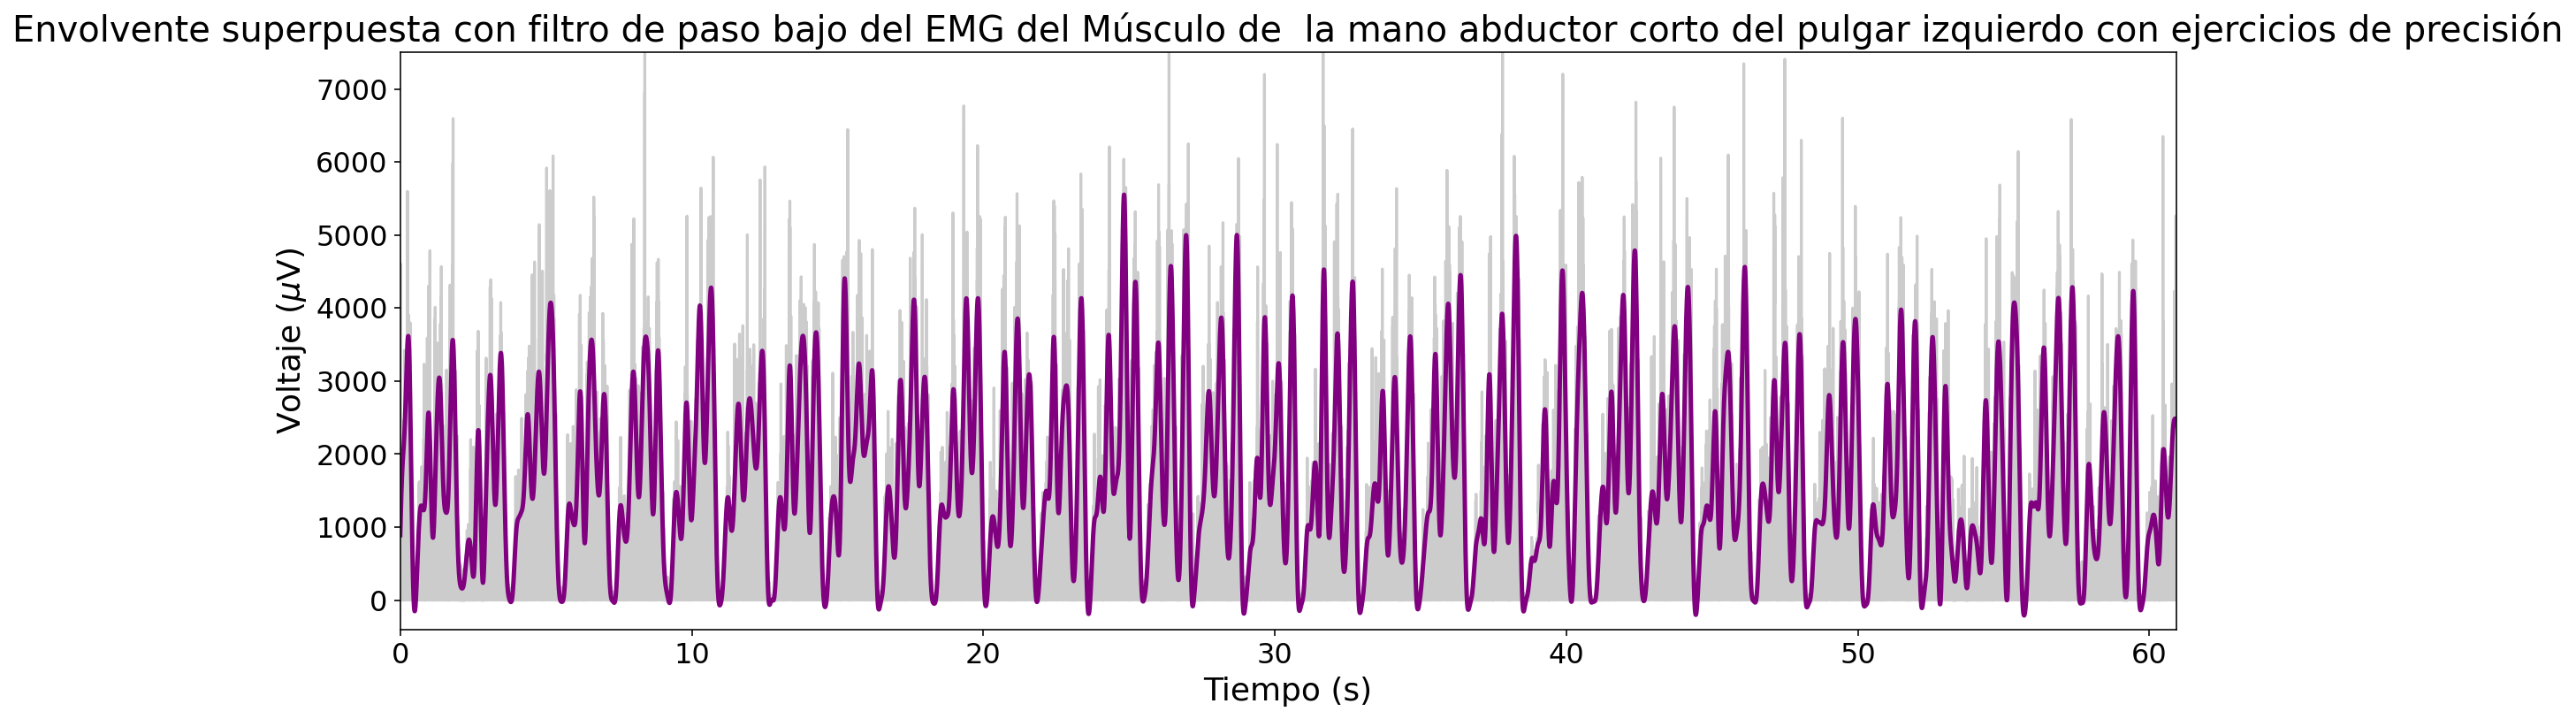

In [10]:
#Trazar señal EMG rectificada con detección de envolvente superpuesta con filtro de paso bajo
plt.figure(figsize=(18,6))
plt.title('Envolvente superpuesta con filtro de paso bajo del EMG del Músculo de  la mano abductor corto del pulgar izquierdo con ejercicios de precisión')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje ($\mu$V)')
plt.plot(Abstiempo,AbsSeñal, 'gray', alpha=0.4)
plt.plot(Abstiempo,datafrle*3, 'purple', linewidth=2.5) 
plt.xlim(0,max(SeñalRelevante['EMGtiempo']))
plt.ylim(-400,7500);

In [11]:
import math            #Permite usar funciones matemáticas definidas en el estándar de C.
import numpy as np     #Creación de vectores y matrices multidimensionales,permite usar otras funciones matemáticas.
import os              #Interfaces misceláneas del sistema operativo.
import pandas as pd    #Sirve para el manejo y análisis de estructuras de datos.
import scipy as sc     #Funciones importadas de numpy.
from scipy import signal#Herramientas de procesamiento de señales, funciones de filtrado, algoritmos de interpolación.
from scipy.fftpack import fft #Devuelve la transformada discreta de Fourier de secuencia real o compleja.
from scipy.signal import butter, lfilter, filtfilt
import wave            #El módulo proporciona una interfaz para el formato de sonido WAV.
import warnings
warnings.filterwarnings('ignore')  #suprimir la advertencia de diseño estrecho
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [12]:
def EMG(archivo,graph):
    
    # Visualización del archivo .wav, es necesario saber la ubicación del archivo y su nombre.
    #Los archivos WAV contienen una secuencia de bits que representan los datos de audio sin procesar.
    record = wave.open(archivo)
    
    #Obtención del número de canales, frecuencia de muestreo, número de fotogramas. 
    NumCanales = record.getnchannels()      #Número de canales y retorna el número de canales de audio. 
    N= record.getnframes()                  #Número de fotogramas.
    FrecMuestreo = record.getframerate()    #Retorna la frecuencia del muestreo.
    AnchoMuestra=record.getsampwidth()      #Retorna el ancho de la muestra en bytes.
    
    #Análisis de datos del archivo .wav
    dstr = record.readframes(N * NumCanales) #Lee y retorna como máximo n cuadros de audio, como un objeto bytes.
    waveData = np.frombuffer(dstr, np.int16) #np.frombuffer es una función para crear una matriz unidimensional utilizando un búfer. 
    #El módulo de ondas "wave" proporciona una interfaz conveniente para el formato de sonido WAV. 
    
    #Imprimimos el número de canales, la frecuencia de muestreo y el ancho de muestra.
    #print('La grabación tiene %d canal(ó canales).' % (NumCanales))
    #print('La frecuencia de muestreo de la grabación es %d Hz.' % (FrecMuestreo))
    #print('La grabación tiene un ancho de muestra de %d' % (AnchoMuestra))
    
    #Calcular la ventana, se utiliza la función linspace para crear matrices con valores espaciados uniformemente, esta 
    #función utiliza una matriz con 5 valores que se encuentren entre 0 y 2.
    EMGtiempo=np.linspace(0, len(waveData)/FrecMuestreo, num=len(waveData))
    
    #Calcular la frecuencia.
    frec = 1/np.mean(np.diff(EMGtiempo))
    
    #Filtro Butterworth de paso de banda a 10-400Hz.
    b, a = butter(2, ([10, 400]/(frec/2)), btype = 'bandpass')
    dataf = filtfilt(b, a, waveData)
    
    
    #Rectificar la señal EMG filtrada.
    AbsSeñal = np.absolute(dataf)
    Abstiempo=np.linspace(0, len(AbsSeñal)/FrecMuestreo, num=len(AbsSeñal))
    
    
    #Filtro Butterworth de paso bajo para detección de envolvente.
    lowp = 8
    sfrec = FrecMuestreo
    low_pass = lowp/sfrec
    b, a = sc.signal.butter(4, low_pass, btype='lowpass')
    datafrle = filtfilt(b, a, AbsSeñal)
    
    #Guardamos los datos más relevantes en una matriz.
    SeñalRelevante={'FrecMuestreo':FrecMuestreo,\
        'waveData':waveData,\
        'EMGtiempo':EMGtiempo,\
        'frec':frec,\
        'dataf':dataf,\
        'AbsSeñal':AbsSeñal,\
        'Abstiempo':Abstiempo,\
        'datafrle':datafrle} 
    
    #Graficamos EMG.   
   
    if graph:
        
        fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize = (20,15))

        #Trazar datos filtrados.
        ax1.plot(EMGtiempo,dataf, 'black')
        ax1.set_title('Datos sin procesar', fontsize=20)
        ax1.set_xlim(0,max(EMGtiempo))
        ax1.set_xlabel('Tiempo (s)')
        ax1.set_ylabel('Voltaje ($\mu$V)')
        
        #Trazar datos rectificados con envolvente.
        ax2.plot(Abstiempo,datafrle*3, 'purple', linewidth=2.5)# multiplique para que encajan los datos
        ax2.plot(Abstiempo,AbsSeñal, 'gray', alpha=0.4)
        ax2.set_title('EMG rectificada con sobre', fontsize=20)
        ax2.set_xlim(0,max(EMGtiempo))
        ax2.set_xlabel('Tiempo (s)')
        ax2.set_ylabel('Voltaje ($\mu$V)')
        
        #Trazar la envolvente con umbral potencial.
        ax3.plot(Abstiempo,datafrle, 'purple')
        ax3.set_title('EMG envoltura', fontsize=20)
        ax3.set_xlim(0,max(EMGtiempo))
        ax3.set_xlabel('Tiempo (s)')

        #espaciado entre trazos
        plt.tight_layout(pad=3.0)
        
    return SeñalRelevante

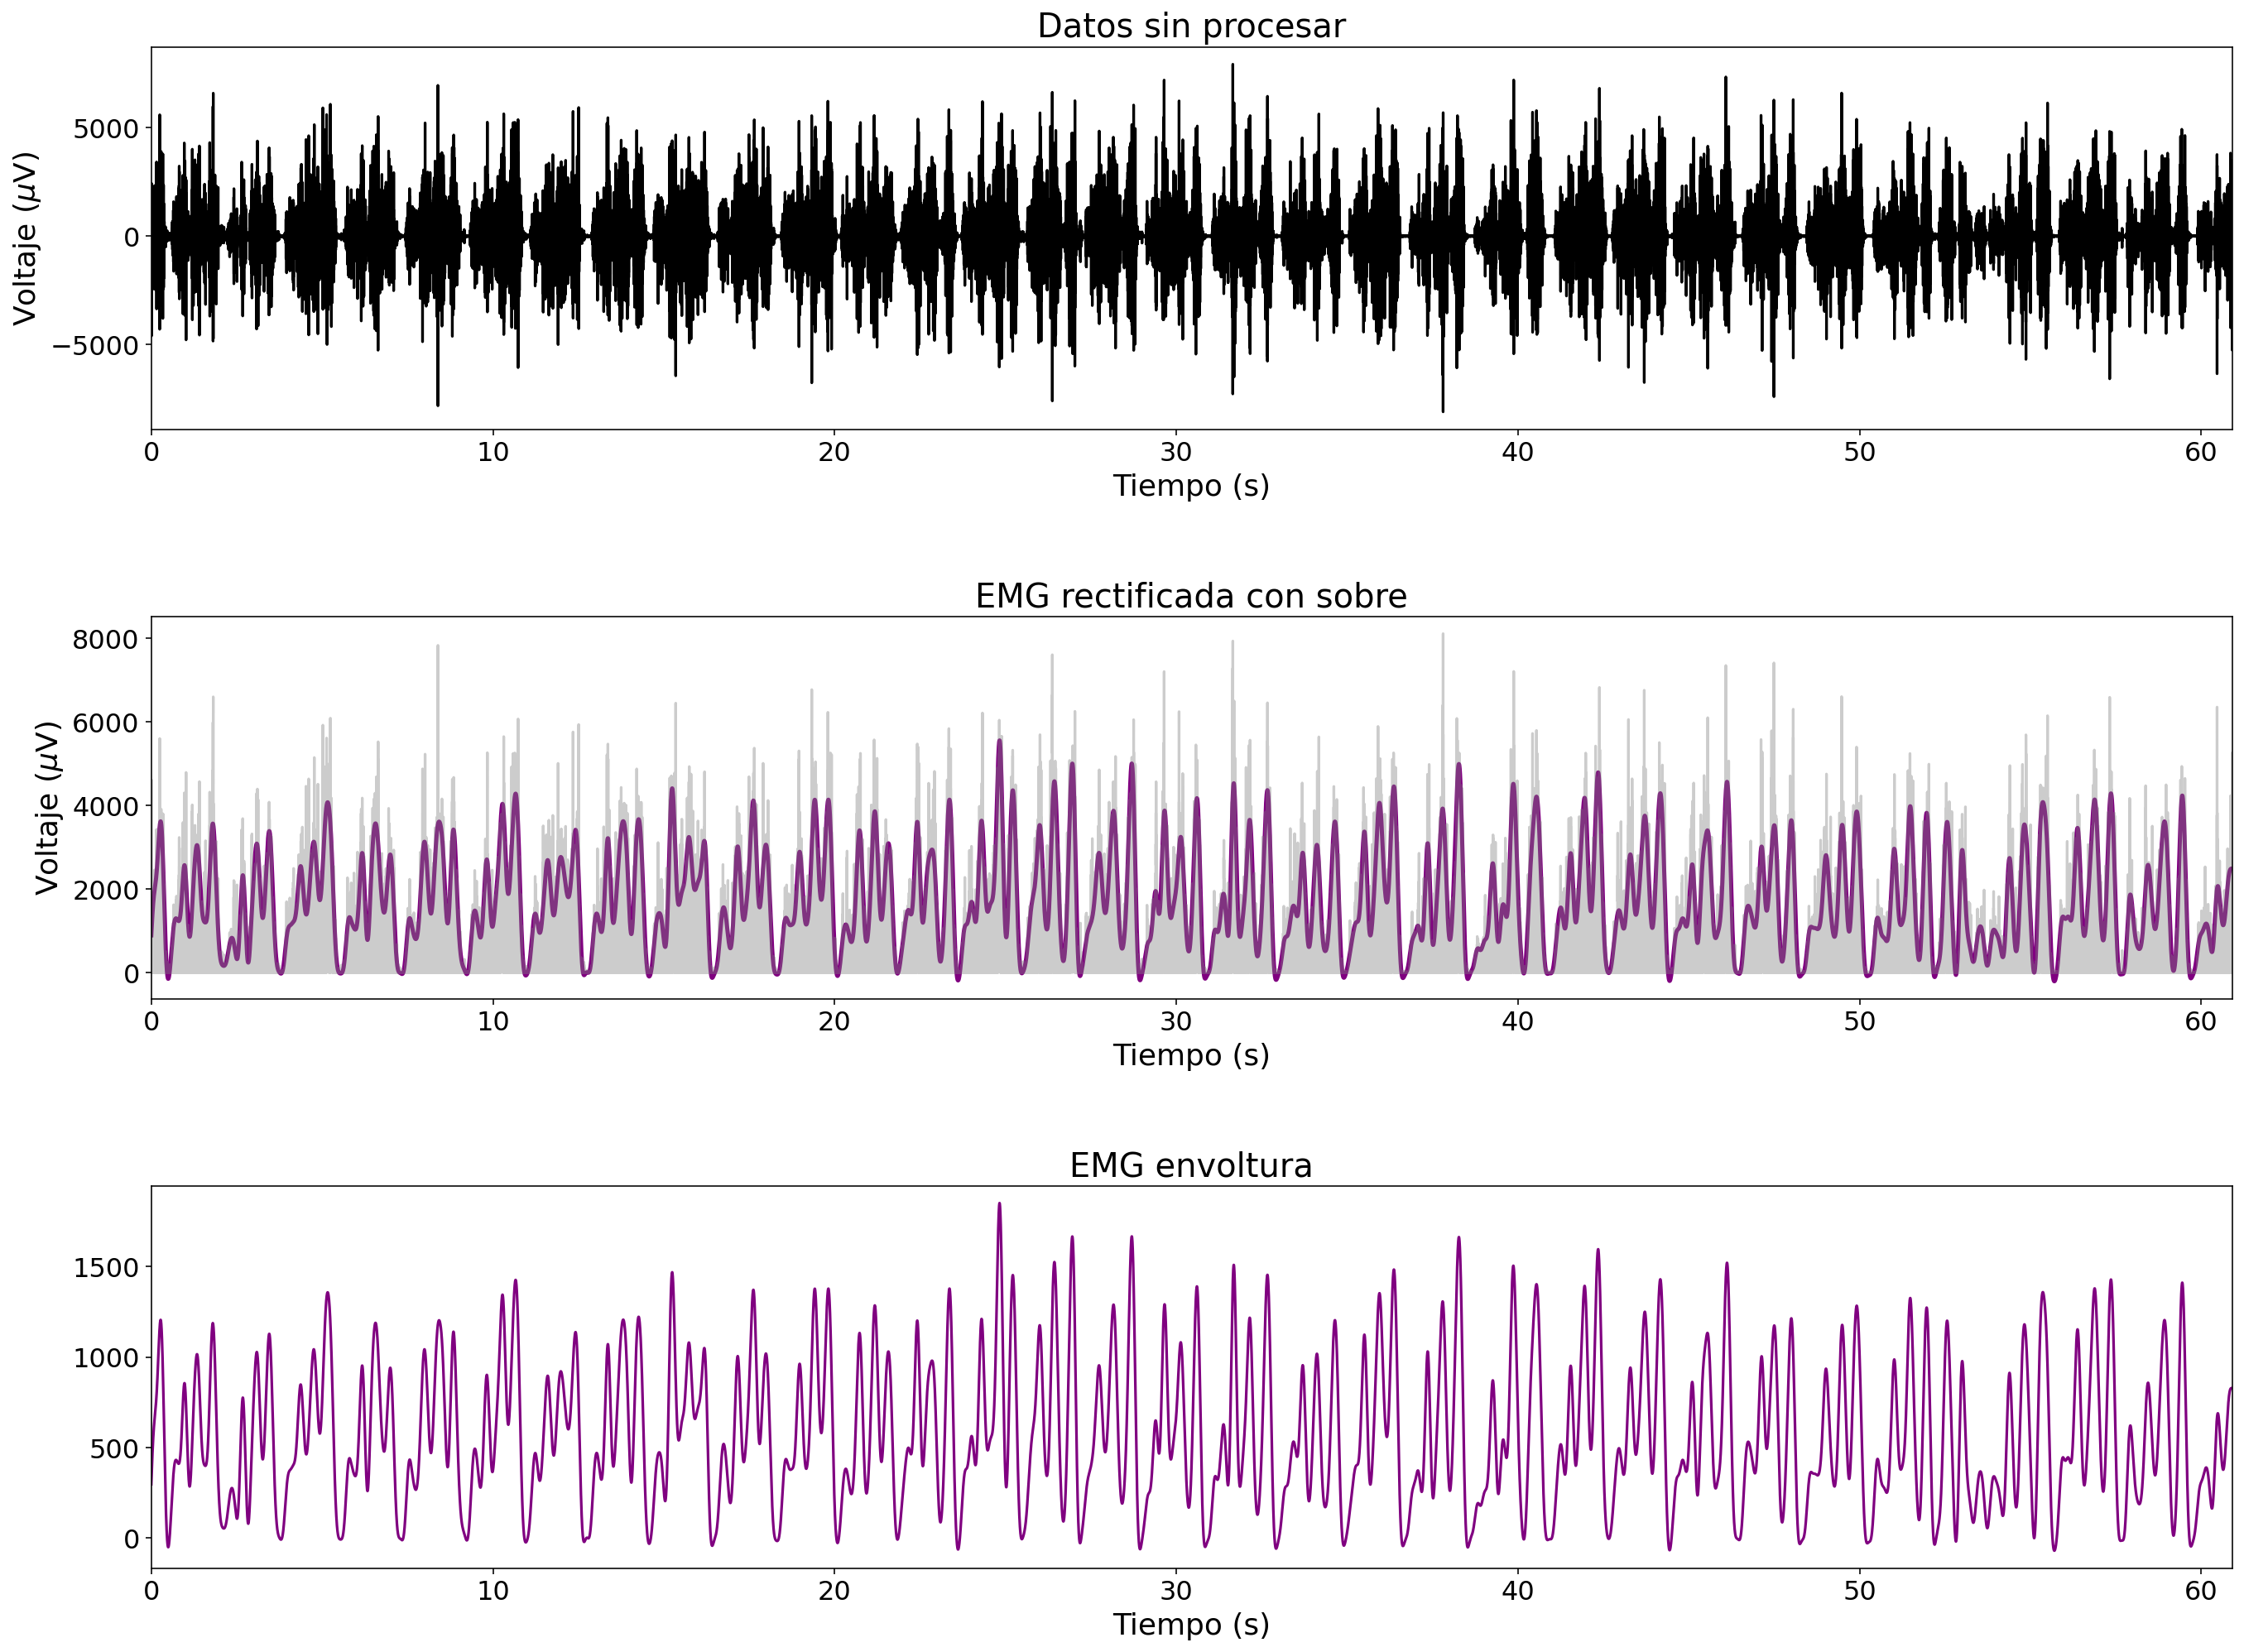

In [13]:
SeñalRelevante = EMG(archivo='../Registros/Mano_Abductor_Izquierda_Precisión.wav',graph=1)

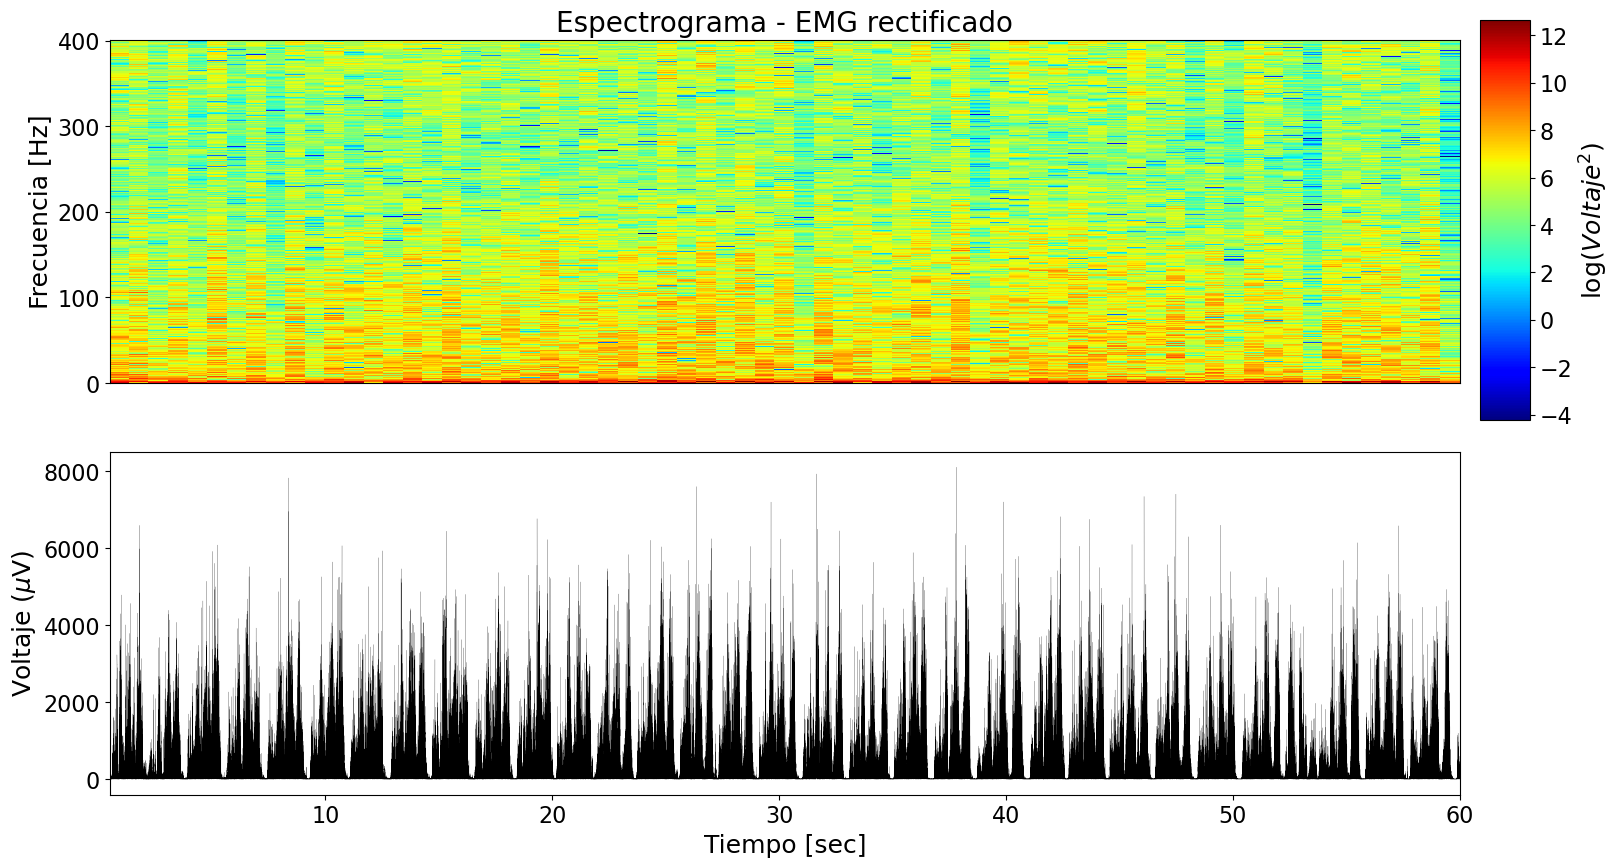

In [14]:
data = SeñalRelevante['AbsSeñal']
f,t,sxx = sc.signal.spectrogram(data,SeñalRelevante['FrecMuestreo'],nperseg=SeñalRelevante['FrecMuestreo'],\
                                scaling='spectrum')
f = f[:401]
sxx = sxx[:401]

#Tamaño de la figura.
fig = plt.figure(figsize=(20,10),dpi=50)

#Trazamos la señal rectificada.
ax2 = plt.subplot(212)
plt.plot(np.arange(0,len(data))/SeñalRelevante['FrecMuestreo'],data,lw=.1,color='black')
plt.ylabel('Voltaje ($\mu$V)')
plt.xlabel('Tiempo [sec]')
plt.xlim(t[0],t[-1])

#Trazamos el espectrograma con la señal rectificada. 
ax1 = plt.subplot(211)
plt.pcolormesh(np.log(sxx),cmap='jet')
plt.xticks([])
plt.ylabel('Frecuencia [Hz]')
plt.title('Espectrograma - EMG rectificado')

#Agregamos un eje independiente para la barra de colores.
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([.81, .5, 0.025, 0.4])
plt.colorbar(label='log($Voltaje^2$)',cax=cbar_ax,)

plt.draw()

H: Debemos tener cuidado con estas señales, puesto que las señales pueden causarnos ruido debido a la vascularización de la mano, entonces la señal puede ser parte del ruido experimental, se deben de hacer más registros.